In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
import itertools
import time
import statsmodels.formula.api as sm

train = pd.read_csv('ncaa_train.csv')
test = pd.read_csv('ncaa_test.csv')
train.head()

,Player,GP,GS,MIN,PTS,FGM,FGA,FGP,3PMade,3PA,...,FTP,OFF,DEF,TRB,AST,STL,BLK,TOV,PF,NBA_PTS
0,Cade Cunningham,27,26,35.4,20.15,6.48,14.81,0.44,2.30,5.74,...,0.85,0.70,5.48,6.19,3.48,1.59,0.78,4.04,2.48,17.41
1,Jalen Suggs,30,30,28.9,14.37,5.17,10.27,0.50,1.17,3.47,...,0.76,0.60,4.73,5.33,4.53,1.90,0.33,2.93,2.60,11.75
2,Franz Wagner,28,26,31.8,12.46,4.43,9.29,0.48,1.25,3.64,...,0.84,0.71,5.82,6.54,3.00,1.25,1.04,1.29,2.21,15.15
3,Davion Mitchell,30,30,32.4,14.00,5.27,10.30,0.51,2.10,4.70,...,0.64,0.47,2.20,2.67,5.50,1.90,0.37,2.43,2.37,11.48
4,James Bouknight,15,14,31.6,18.73,6.53,14.60,0.45,1.47,5.00,...,0.78,1.53,4.13,5.67,1.80,1.13,0.27,2.80,1.87,4.58


In [60]:
train.corr()['NBA_PTS'].sort_values(ascending=False)

NBA_PTS    1.000000
GS         0.433931
FTP        0.351406
GP         0.337517
FGP        0.175595
3P         0.118538
3PMade    -0.088612
3PA       -0.115555
STL       -0.119924
PTS       -0.127831
FGM       -0.127960
DEF       -0.133304
FGA       -0.134550
BLK       -0.135632
MIN       -0.137165
FTM       -0.138844
TRB       -0.140068
TOV       -0.140331
PF        -0.141934
AST       -0.145064
FTA       -0.148000
OFF       -0.172655
Name: NBA_PTS, dtype: float64

In [41]:
model1 = sm.ols(formula = 'NBA_PTS~GS', data=train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NBA_PTS   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     6.727
Date:                Thu, 02 Mar 2023   Prob (F-statistic):             0.0147
Time:                        22:44:16   Log-Likelihood:                -85.405
No. Observations:                  31   AIC:                             174.8
Df Residuals:                      29   BIC:                             177.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5538      2.429      0.228      0.821      -4.414       5.521
GS             0.2521      0.097      2.594      0.015       0.053       0.451
==============================================================================
Omnibus:                        3.915   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                2.692
Skew:                           0.704   Prob(JB):                        0.260
Kurtosis:                       3.315   Cond. No.                         86.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='GS', ylabel='NBA_PTS'>

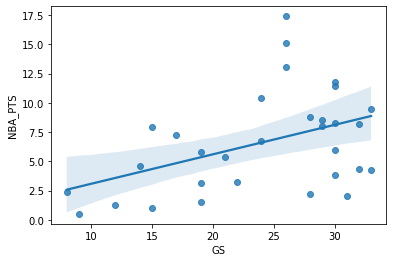

In [50]:
sns.regplot(x='GS',y='NBA_PTS', data=train)

In [42]:
preds1 = model1.predict(test)
actuals = test[['NBA_PTS']]
actuals = actuals.iloc[:,0]
print('RMSE = ', np.sqrt(((preds1 - actuals)**2).mean()),'resid. standard error = ',np.sqrt(model1.mse_resid))

RMSE =  5.576177146620047 resid. standard error =  3.9329616080267082


Text(0, 0.5, 'Residuals')

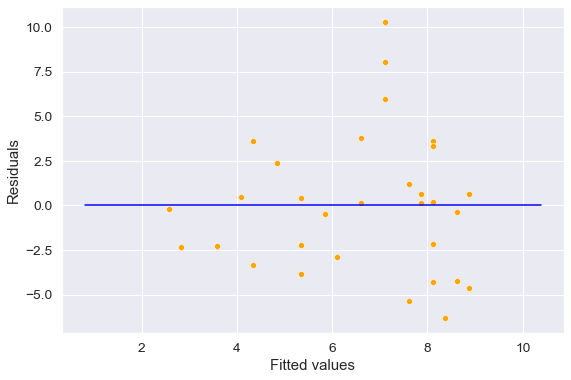

In [58]:
#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model1.fittedvalues, y=model1.resid,color = 'orange')
sns.lineplot(x = [preds1.min(),preds1.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

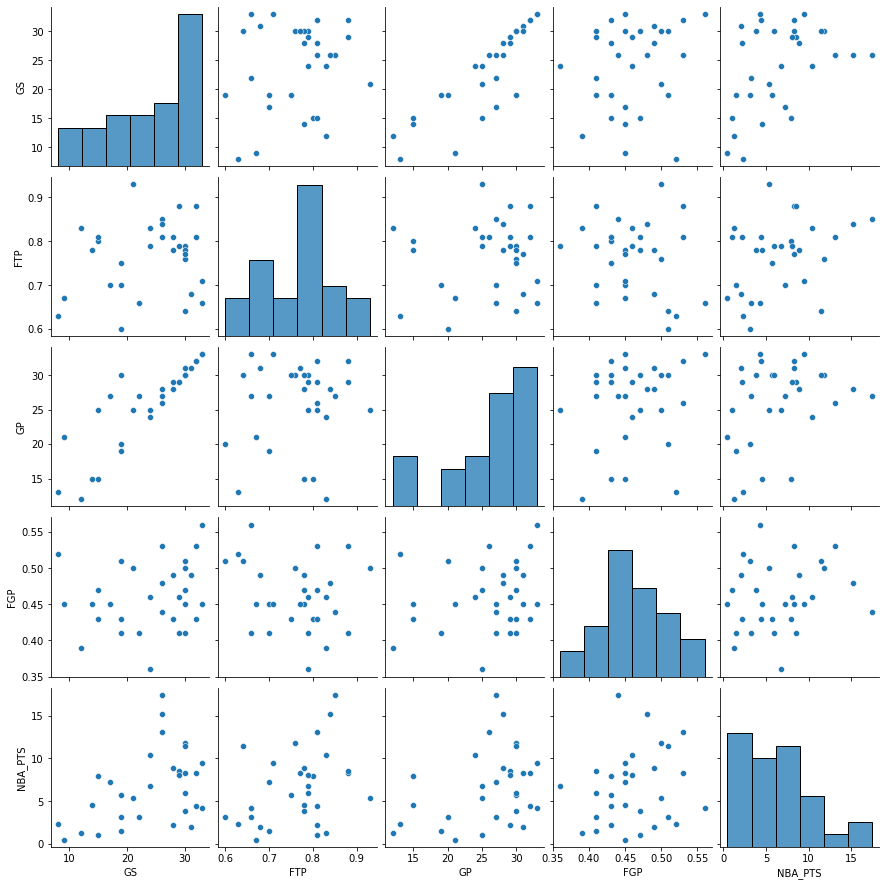

In [43]:
top4 = train[['GS','FTP','GP','FGP','NBA_PTS']]
sns.pairplot(top4)

In [53]:
model2 = sm.ols(formula = 'np.log(NBA_PTS)~GS+GP+FTP+FGP+I(GS**2)+I(GP**2)+I(FGP**2)', data=train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(NBA_PTS)   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     3.303
Date:                Thu, 02 Mar 2023   Prob (F-statistic):             0.0140
Time:                        22:51:58   Log-Likelihood:                -27.625
No. Observations:                  31   AIC:                             71.25
Df Residuals:                      23   BIC:                             82.72
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.2172     10.591     -0.776      0.446     -30.126      13.692
GS              0.4276      0.169      2.526      0.019       0.077       0.778
GP             -0.2668      0.257     -1.037      0.311      -0.799       0.266
FTP             1.7933      1.700      1.055      0.302      -1.723       5.310
FGP            24.4891     46.794      0.523      0.606     -72.313     121.291
I(GS ** 2)     -0.0083      0.004     -2.032      0.054      -0.017       0.000
I(GP ** 2)      0.0053      0.006      0.892      0.381      -0.007       0.017
I(FGP ** 2)   -21.7710     50.580     -0.430      0.671    -126.404      82.862
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   1.343
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.107
Skew:                          -0.472   Prob(JB):                        0.349
Kurtosis:                       2.140   Cond. No.                     5.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
preds2 = model2.predict(test)
actuals = test[['NBA_PTS']]
actuals = actuals.iloc[:,0]
print('RMSE = ', np.sqrt(((preds2 - actuals)**2).mean()),'resid. standard error = ',np.sqrt(model2.mse_resid))

RMSE =  7.310378844092086 resid. standard error =  0.684850337045957


Text(0, 0.5, 'Residuals')

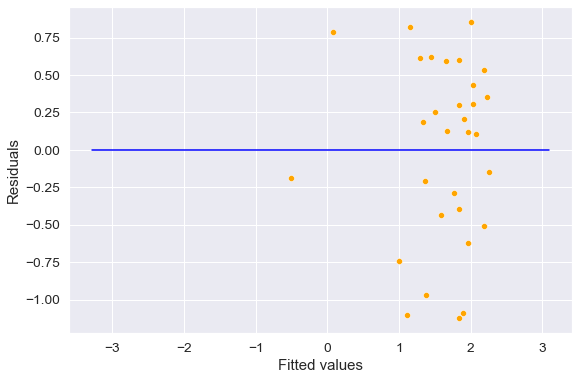

In [57]:
#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model2.fittedvalues, y=model2.resid,color = 'orange')
sns.lineplot(x = [preds2.min(),preds2.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')